# Notebook for data analysis

We will use Pandas library to get insights for data collected during simulations.

Created using python 3.10.12

Read .csv file into pd.Dataframe object


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = "factory-sim/simulations/"
file_name = "output.csv"
df = pd.read_csv(data_dir + file_name)

numeric_cols = df.columns.difference(["mode"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = "coerce")

/tmp/ipykernel_53860/816053581.py:7: DtypeWarning: Columns (0,1,2,3,4,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir + file_name)


Select --->  mode, N, p

In [ ]:
mode = "parallelized" # mode = {parallelized, pipelined}
N = 1 # N = {1,5,100}
p = 0.5 # p = {0.5, 0.9, 0.99}

def varname(var, scope=globals()):
    return [name for name, val in scope.items() if val is var][0]

def print_descriptive_array(array) :
    print(
        str(mode) + " | N=" + str(N) + " | p=" +  str(p) + "\n\n"
        
        "Descriptive Statistics for "+  varname(array) + ":     \n" +
        "No. of Observations:          " + str(len(array)) + "\n" +
        "Min - Max values:            [" + str(np.min(array)) + ", " + str(np.max(array)) + "]\n" +
        "[0.25, 0.5, 0.75] quantiles: [" + str(np.quantile(array, 0.25)) + ", " + str(np.quantile(array, 0.5)) +  ", " + str(np.quantile(array, 0.75)) +"]\n" + 
        "Mean:                         " + str(np.mean(array)) + "\n" + 
        "Variance (Standard Dev.):     " + str(np.var(array)) + " (" + str(np.std(array)) + ")\n")

selected_df = df.iloc[np.where((df["mode"] == mode) & (df["N"] == N) & (df["p"] == p))].reset_index()

# Production times of non-defective items

In [78]:
produced_idx = np.where(selected_df["prod_time"] > 0)
produced_items = selected_df.iloc[produced_idx].reset_index()


production_times = np.array(produced_items["prod_time"] - produced_items["arrival_time"])


Descriptive statistics

In [52]:
print_descriptive_array(production_times)

parallelized | N=1 | p=0.5

Descriptive Statistics for production_times:     
No. of Observations:          100470
Min - Max values:            [5.503371448867256e-05, 0.9999208252411336]
[0.25, 0.5, 0.75] quantiles: [0.2481768662109971, 0.5001961558589869, 0.7521912502124906]
Mean:                         0.5002101354394382
Variance (Standard Dev.):     0.08404258380365238 (0.28990098965621414)



Warm-up Period analysis

In theory, having no queues in the parallelized framework, we should have no warm-up period, while we have to verify that in the pipelined scenario.

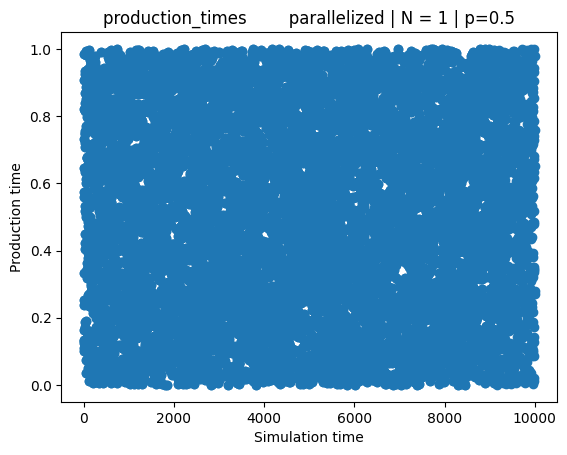

array([[ 1.        , -0.00220573],
       [-0.00220573,  1.        ]])

In [67]:
max_time = 2000 #maximum simulation time (s) visualized
times = np.where(produced_items["prod_time"] <= max_time)[0]
plt.scatter(x = produced_items["prod_time"].iloc[0:len(times)], y = production_times[0:len(times)])
plt.title(varname(production_times) + "        " + str(mode) + " | N = " + str(N) + " | p=" +  str(p))
plt.xlabel("Simulation time")
plt.ylabel("Production time")
plt.show()
np.corrcoef(produced_items["prod_time"].iloc[0:len(times)], production_times[0:len(times)])

In [71]:
produced_items["prod_time"].iloc[0:len(times)]

2           1.261190
4           1.541708
5           2.187183
8           3.913524
11          4.451809
            ...     
38305    9159.061788
38306    9159.119229
38307    9159.330937
38308    9160.312694
38309    9160.580625
Name: prod_time, Length: 19270, dtype: float64

In [74]:
np.where(produced_items["prod_time"] <= max_time)[0]

array([    0,     1,     2, ..., 92347, 92348, 92349])

Moving average smoothing

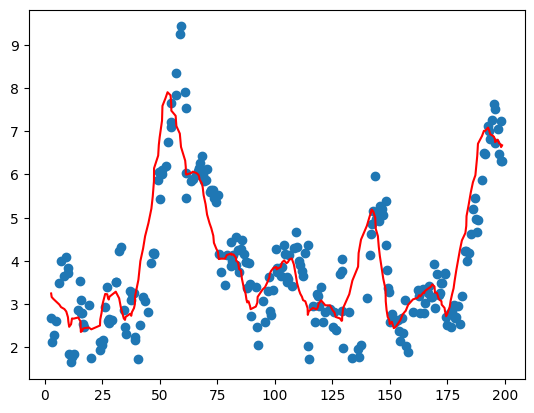

In [ ]:
window = 10

ma_pt = np.convolve(production_times, np.ones(window) / window, mode="valid")

plt.scatter(produced_items["prod_time"].iloc[0:len(times)], production_times[0:len(times)])
plt.plot(produced_items["prod_time"].iloc[0:len(times)], ma_pt[0:len(times)], color = "red")

plt.show()

Empirical distribution of production times

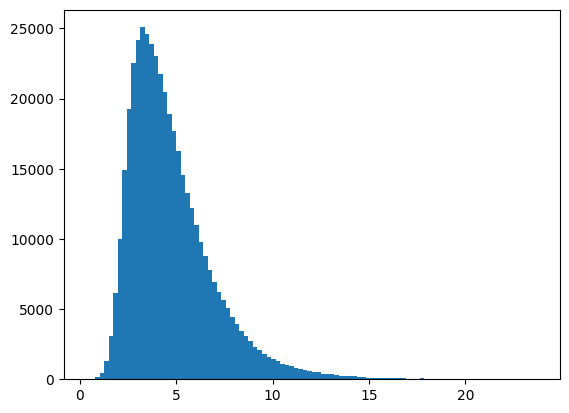

In [ ]:
plt.hist(production_times, bins = 100)
plt.show()

In [ ]:
df = pd.read_csv("/home/erni/factory-simulation/factory-sim/simulations/results/vectors_long.csv", sep=";")


In [ ]:
df

,run,configname,mode,N,p,seedset,file,vectorId,module,name,event,time,value
0,Pipelined-0-20260109-21:22:05-33814,Pipelined,pipelined,4,0.9,NaN,Pipelined-#0.vec,0,Factory.assemblyLine.robot[0],busyPeriod:vector,2,0.548814,0.548814
1,Pipelined-0-20260109-21:22:05-33814,Pipelined,pipelined,4,0.9,NaN,Pipelined-#0.vec,0,Factory.assemblyLine.robot[0],busyPeriod:vector,8,1.393079,0.844266
2,Pipelined-0-20260109-21:22:05-33814,Pipelined,pipelined,4,0.9,NaN,Pipelined-#0.vec,0,Factory.assemblyLine.robot[0],busyPeriod:vector,12,1.816734,0.423655
3,Pipelined-0-20260109-21:22:05-33814,Pipelined,pipelined,4,0.9,NaN,Pipelined-#0.vec,0,Factory.assemblyLine.robot[0],busyPeriod:vector,22,2.462628,0.645894
4,Pipelined-0-20260109-21:22:05-33814,Pipelined,pipelined,4,0.9,NaN,Pipelined-#0.vec,0,Factory.assemblyLine.robot[0],busyPeriod:vector,28,2.846070,0.383442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940235,Parallelized-9-20260109-21:27:03-34065,Parallelized,parallelized,4,0.9,128.0,Parallelized-#9.vec,6,Factory.receiver,defectiveLifetime:vector,206722,9992.115538,0.227573
1940236,Parallelized-9-20260109-21:27:03-34065,Parallelized,parallelized,4,0.9,128.0,Parallelized-#9.vec,6,Factory.receiver,defectiveLifetime:vector,206730,9992.274047,0.158509
1940237,Parallelized-9-20260109-21:27:03-34065,Parallelized,parallelized,4,0.9,128.0,Parallelized-#9.vec,6,Factory.receiver,defectiveLifetime:vector,206766,9994.246398,0.549855
1940238,Parallelized-9-20260109-21:27:03-34065,Parallelized,parallelized,4,0.9,128.0,Parallelized-#9.vec,6,Factory.receiver,defectiveLifetime:vector,206822,9997.490392,1.218513


In [ ]:
df.file.unique()

array(['Pipelined-#0.vec', 'Parallelized-#0.vec', 'Parallelized-#9.vec'],
      dtype=object)